# Erwan LeCun
## PUI_HW4-1_ErwanLeCun

Populating the interactive namespace from numpy and matplotlib


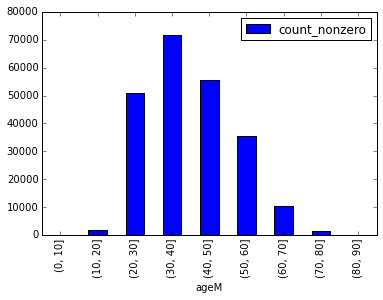

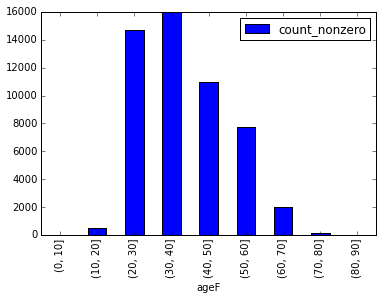

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
%pylab inline

r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201501-citibike-tripdata.csv")
df = pd.read_csv(citibike_csv)


df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

bins = np.arange(0, 99, 10)

df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).plot(kind='bar')

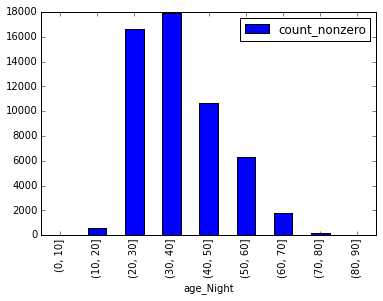

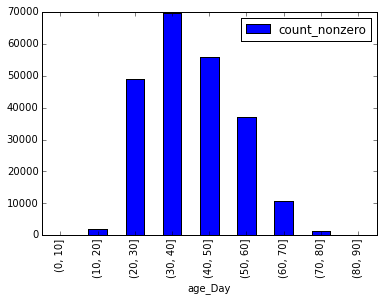

In [2]:
df['date'] = pd.to_datetime(df['starttime'])
df['mystarttime'] = df['date'].dt.hour

df['age_Night'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['mystarttime'] < 6) | (df['mystarttime'] > 18))]
df['age_Day'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['mystarttime'] >= 6) & (df['mystarttime'] <= 18))]

bins = np.arange(0, 99, 10)

df.age_Night.groupby(pd.cut(df.age_Night, bins)).agg([np.count_nonzero]).plot(kind='bar')
df.age_Day.groupby(pd.cut(df.age_Day, bins)).agg([np.count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(0, 10]             NaN
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


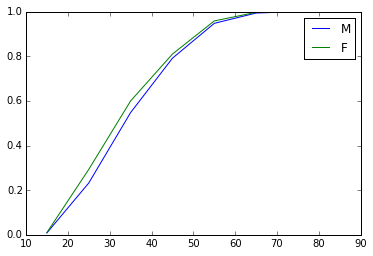

In [3]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

           count_nonzero
age_Night               
(0, 10]              NaN
(10, 20]        0.002374
(20, 30]        0.091860
(30, 40]        0.114181
(40, 50]        0.064402
(50, 60]        0.016694
(60, 70]        0.002409
(70, 80]        0.000041
(80, 90]        0.000000


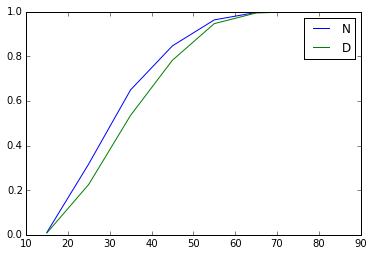

In [4]:
csNight=df.age_Night.groupby(pd.cut(df.age_Night, bins)).agg([np.count_nonzero]).cumsum()

csDay=df.age_Day.groupby(pd.cut(df.age_Day, bins)).agg([np.count_nonzero]).cumsum()

print np.abs(csNight / csNight.max() - csDay / csDay.max())

pl.plot(bins[:-1] + 5, csNight / csNight.max(), label = "N")
pl.plot(bins[:-1] + 5, csDay / csDay.max(), label = "D")
pl.legend()

In [5]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF, )
print 'KS test for age (male, female):'
print (ks)
print ""
ks = scipy.stats.ks_2samp(df.age_Night, df.age_Day)
print 'KS test for age (night, day):'
print (ks)

KS test for age (male, female):
(0.61519793242561782, 0.0)

KS test for age (night, day):
(0.6012565136997815, 0.0)


### Conclusion Male/Female: 
#### We reject the Null Hypothesis that the two samples are drawn from the same distribution, since the p-value is very small.

### Conclusion Night/Day: 
#### We reject the Null Hypothesis that the two samples are drawn from the same distribution, since the p-value is very small.

In [6]:
ageMtemp = df.ageM
ageFtemp = df.ageF

ageMtemp = ageMtemp[np.logical_not(np.isnan(ageMtemp))]
ageFtemp = ageFtemp[np.logical_not(np.isnan(ageFtemp))]

ageM2 = np.random.choice(ageMtemp, 20000, replace = False)
ageF2 = np.random.choice(ageFtemp, 20000, replace = False)
    
pn = scipy.stats.pearsonr(ageM2, ageF2)

print 'Pearsons test of age (male, female)'
print (pn)
print ""

age_Nighttemp = df.age_Night
age_Daytemp = df.age_Day

age_Nighttemp = age_Nighttemp[np.logical_not(np.isnan(age_Nighttemp))]
age_Daytemp = age_Daytemp[np.logical_not(np.isnan(age_Daytemp))]

age_Night2 = np.random.choice(age_Nighttemp, 20000, replace = False)
age_Day2 = np.random.choice(age_Daytemp, 20000, replace = False)
    
pn = scipy.stats.pearsonr(age_Night2, age_Day2)

print 'Pearsons test of age (night, day)'
print (pn)

Pearsons test of age (male, female)
(9.5217025118673261e-05, 0.98925690539921007)

Pearsons test of age (night, day)
(0.0025596243823579321, 0.71737929165101422)


### Conclusion for Male/Female: 
#### We do not reject the Null Hypothesis that there is no correlation between the two datasets, since the p-value is large.

### Conclusion for Night/Day: 
#### We do not reject the Null Hypothesis that there is no correlation between the two datasets, since the p-value is large.

In [7]:
sm = scipy.stats.spearmanr(ageM2, ageF2)
print 'Spearmans test for age (male, female):'
print (sm)
print ""
sm = scipy.stats.spearmanr(age_Night2, age_Day2)
print 'Spearmans test for age (night, day):'
print (sm)

Spearmans test for age (male, female):
(-0.00015435227424266735, 0.98258568221536158)

Spearmans test for age (night, day):
(0.0066575631941831791, 0.34646241598855876)


### Conclusion for Male/Female: 
####We do not reject the null hypothesis that there is no correlation between the two datasets, since the p-value is large.

### Conclusion for Night/Day: 
####We do not reject the null hypothesis that there is no correlation between the two datasets, since the p-value is large.